In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# New Section

In [6]:
df = pd.read_csv('2025_06_15_MousedB.csv', sep=';')

In [7]:
df.head()

,Brand,Name,Length (mm),Width (mm),Height (mm),Weight (g),Shape,Hump placement,Front flare,Side curvature,...,Connectivity,Sensor,Sensor technology,Sensor position,DPI,Polling rate,Tracking speed (IPS),Acceleration (G),Side buttons,Middle buttons
0,Pulsar ZywOo,The Chosen Mouse - Mini,115.6,63.4,40.7,55.0,Ergonomic,Center,Outward - moderate,Inward,...,Wireless,Pulsar XS-1,Optical,Centered (51%),32000,8000,750,50,2,0
1,Pulsar ZywOo,The Chosen Mouse - Medium,122.0,66.0,43.0,59.0,Ergonomic,Center,Outward - moderate,Inward,...,Wireless,Pulsar XS-1,Optical,Centered (51%),32000,8000,750,50,2,0
2,WLmouse,Sword X,123.0,67.0,42.0,47.0,Ergonomic,Center,Outward - moderate,Inward,...,Wireless,PixArt PAW3950 HS,Optical,Centered (52%),30000,8000,750,50,2,0
3,Darmoshark,M3 Micro Pro,105.5,54.6,33.5,42.0,Symmetrical,Back - moderate,Outward - slight,Inward,...,Wireless,PixArt PAW3950,Optical,Front - minimal (54%),30000,8000,750,50,2,0
4,ASUS,ROG Gladius II Wireless,126.0,67.0,45.0,90.0,Ergonomic,Center,Outward - aggressive,Inward,...,Wireless,PixArt PMW3389,Optical,Front - minimal (53%),16000,1000,400,50,2,1


In [8]:
df.tail()

,Brand,Name,Length (mm),Width (mm),Height (mm),Weight (g),Shape,Hump placement,Front flare,Side curvature,...,Connectivity,Sensor,Sensor technology,Sensor position,DPI,Polling rate,Tracking speed (IPS),Acceleration (G),Side buttons,Middle buttons
1033,Xtrfy,M4 Wireless,120.0,68.0,39.0,71.0,Ergonomic,Back - minimal,Inward,No,...,Wireless,PixArt PAW3370,NaN,Centered (50%),19000,NaN,400,50,2,1
1034,Xtrfy,MZ1,111.0,58.5,36.5,56.0,Symmetrical,Flat,Inward,Back - aggressive,...,Wired,PixArt PMW3389,NaN,Centered (51%),16000,NaN,400,50,2,1
1035,Xtrfy,MZ1 Wireless,111.0,58.5,36.5,62.0,Symmetrical,Flat,Inward,Back - aggressive,...,Wireless,PixArt PAW3370,NaN,Centered (51%),19000,NaN,400,50,2,1
1036,Razer,Orochi V2,107.0,62.0,38.0,68.0,Symmetrical,Back - minimal,Inward,Inward - moderate,...,Wireless,Razer Razer 5G,NaN,Front - aggressive (61%),18000,NaN,450,50,2,1
1037,Zowie,EC1-C,130.0,69.0,42.0,80.0,Ergonomic,Center,Inward,No,...,Wired,PixArt PMW3360,NaN,Front - minimal (55%),3200,NaN,250,50,2,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 1038 non-null   object 
 1   Name                  1038 non-null   object 
 2   Length (mm)           1038 non-null   float64
 3   Width (mm)            1038 non-null   float64
 4   Height (mm)           1038 non-null   float64
 5   Weight (g)            1038 non-null   object 
 6   Shape                 1038 non-null   object 
 7   Hump placement        1038 non-null   object 
 8   Front flare           1038 non-null   object 
 9   Side curvature        1038 non-null   object 
 10  Hand compatibility    1000 non-null   object 
 11  Thumb rest            1038 non-null   object 
 12  Ring finger rest      1038 non-null   object 
 13  Material              1000 non-null   object 
 14  Connectivity          1038 non-null   object 
 15  Sensor               

In [10]:
df.describe()

,Length (mm),Width (mm),Height (mm)
count,1038.000000,1038.000000,1038.000000
mean,120.337091,65.629672,39.521002
std,8.884800,5.995906,5.214759
min,72.300000,14.400000,19.000000
25%,118.000000,62.225000,38.000000
50%,121.100000,64.300000,39.000000
75%,125.000000,67.000000,41.000000
max,144.500000,100.000000,126.000000


In [11]:
df.dtypes

,0
Brand,object
Name,object
Length (mm),float64
Width (mm),float64
Height (mm),float64
Weight (g),object
Shape,object
Hump placement,object
Front flare,object
Side curvature,object


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.shape

(1038, 24)

In [14]:
df.isnull().sum()

,0
Brand,0
Name,0
Length (mm),0
Width (mm),0
Height (mm),0
Weight (g),0
Shape,0
Hump placement,0
Front flare,0
Side curvature,0


In [15]:
df.isnull().sum().sum()

np.int64(152)

In [16]:
df.columns

Index(['Brand', 'Name', 'Length (mm)', 'Width (mm)', 'Height (mm)',
       'Weight (g)', 'Shape', 'Hump placement', 'Front flare',
       'Side curvature', 'Hand compatibility', 'Thumb rest',
       'Ring finger rest', 'Material', 'Connectivity', 'Sensor',
       'Sensor technology', 'Sensor position', 'DPI', 'Polling rate',
       'Tracking speed (IPS)', 'Acceleration (G)', 'Side buttons',
       'Middle buttons'],
      dtype='object')

In [17]:
numeric_cols = ['Length (mm)', 'Width (mm)', 'Height (mm)', 'Weight (g)',
                'DPI', 'Polling rate', 'Tracking speed (IPS)', 'Acceleration (G)']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

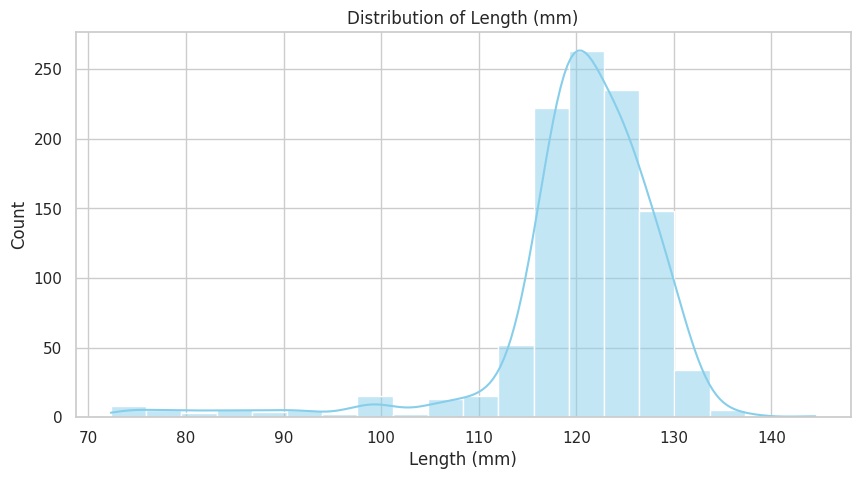

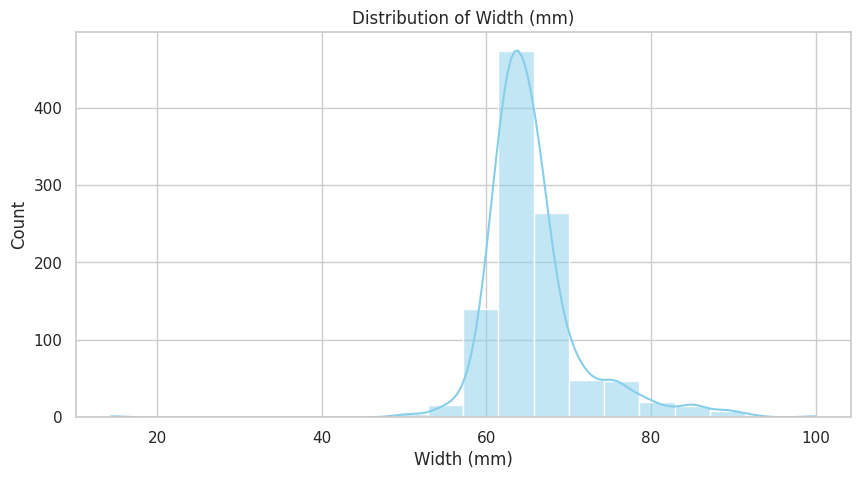

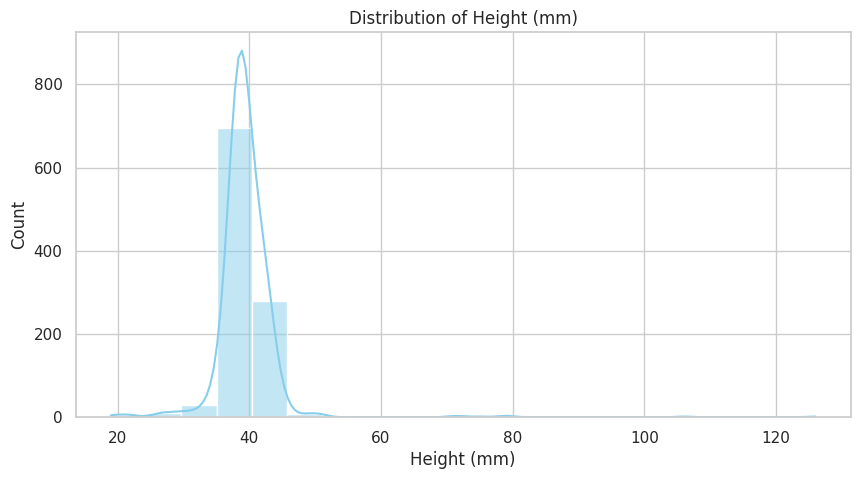

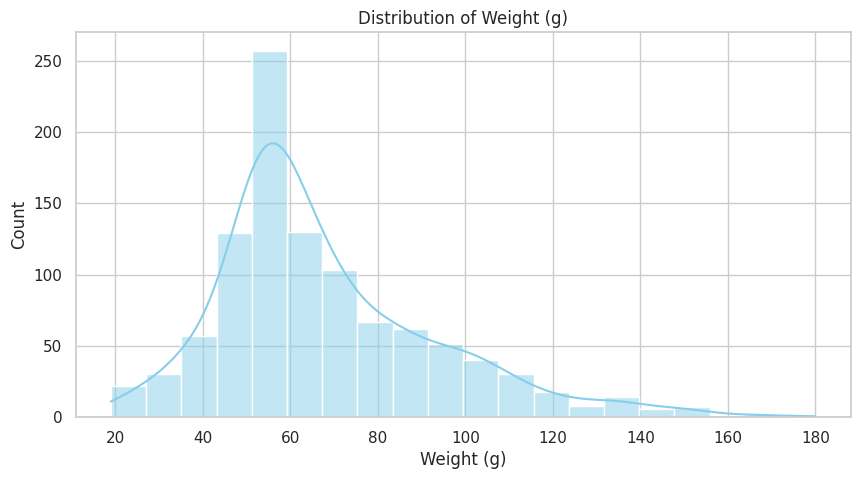

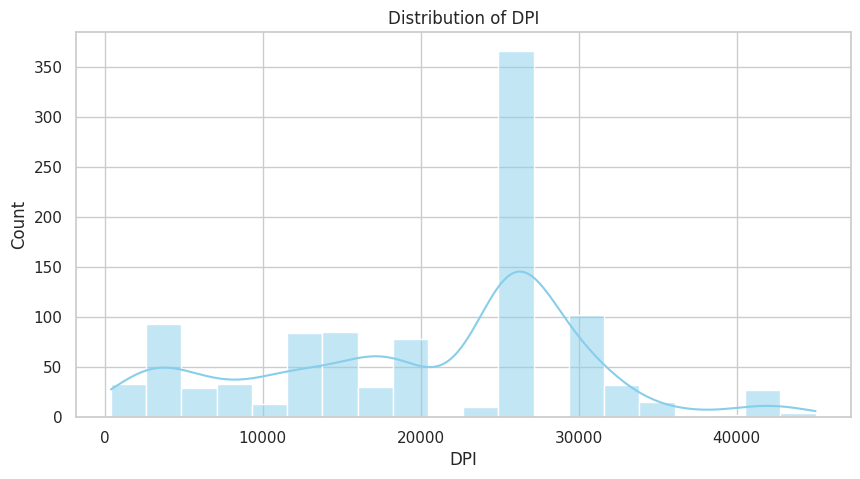

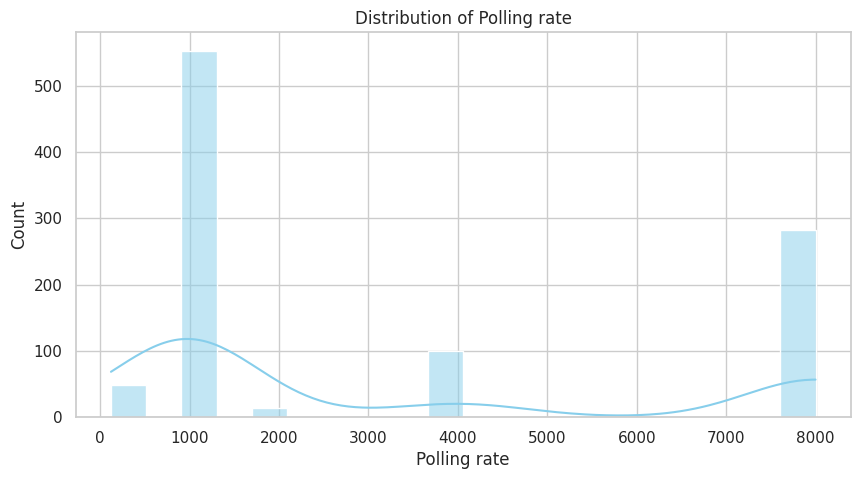

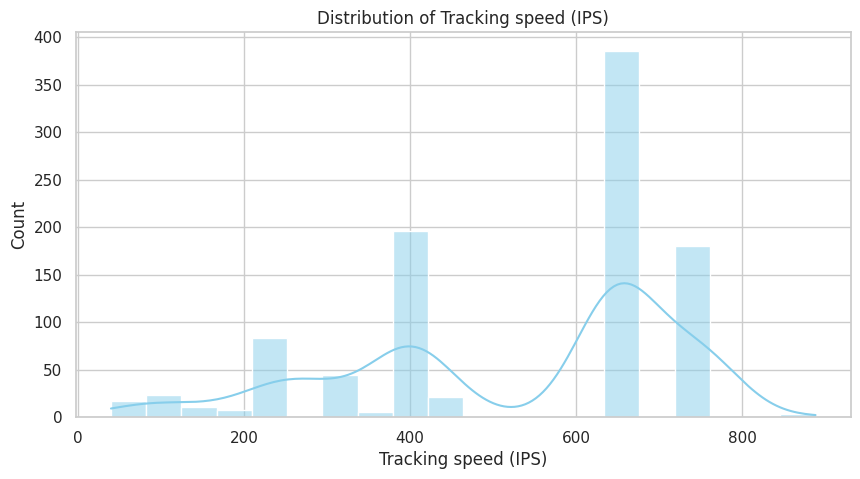

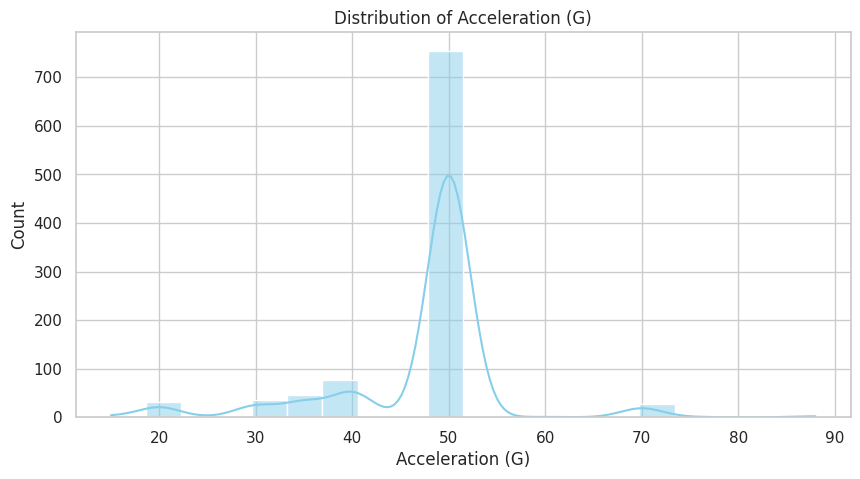

In [18]:
# Set seaborn style
sns.set(style="whitegrid")
plt.rcParams.update({'figure.figsize': (10, 5)})

# 1. Histograms of numeric features
for col in numeric_cols:
    sns.histplot(df[col].dropna(), kde=True, bins=20, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

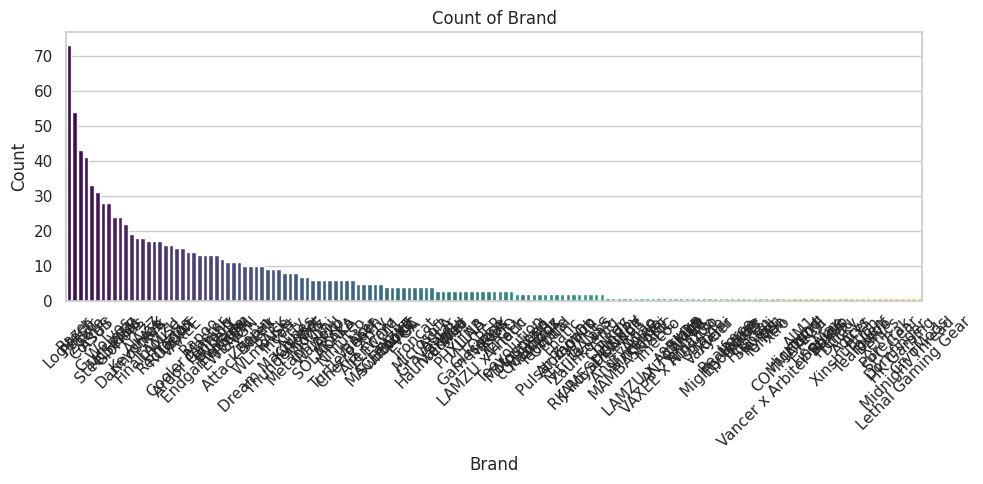

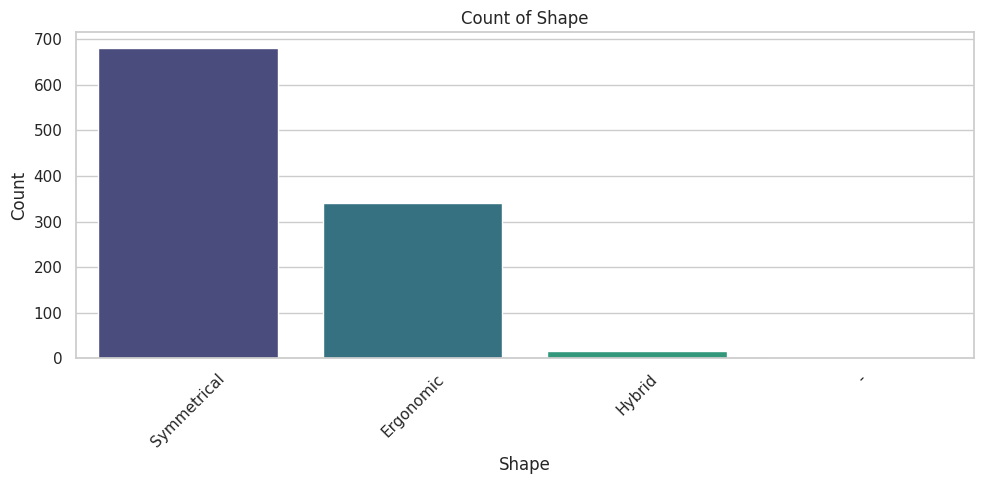

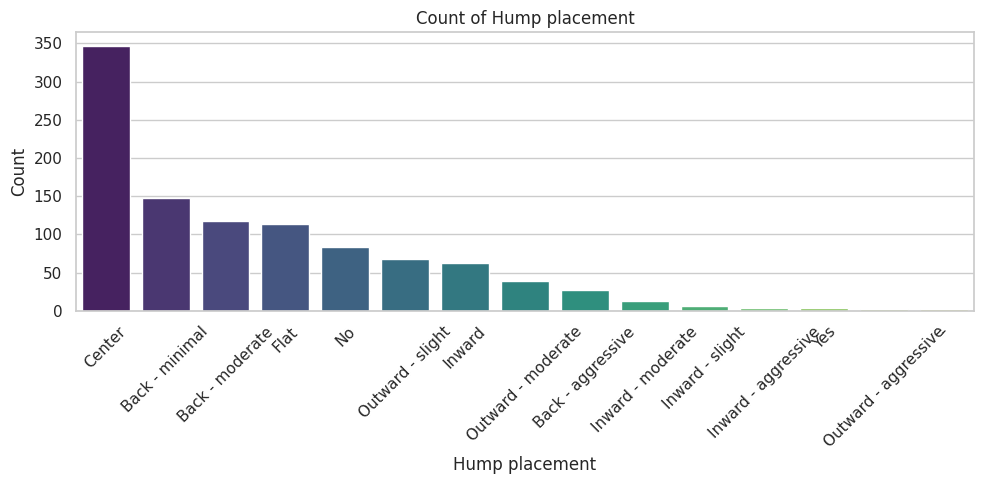

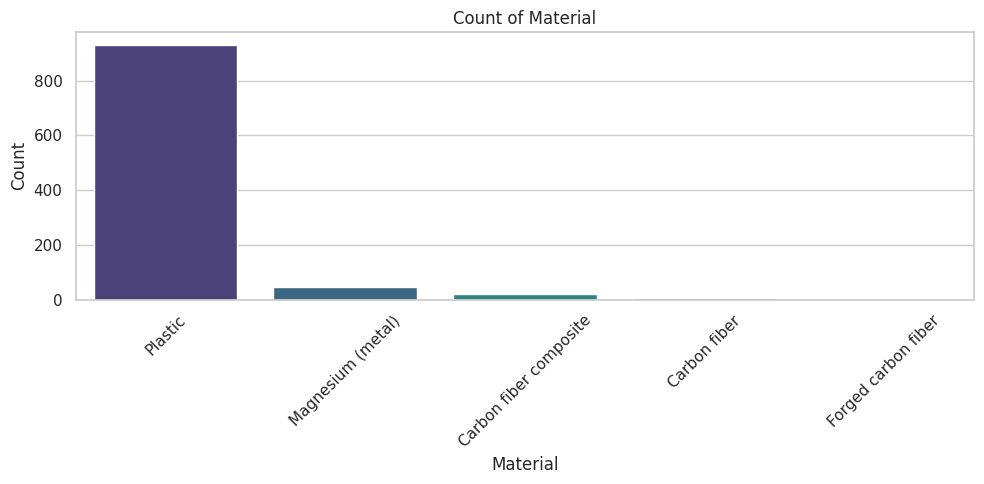

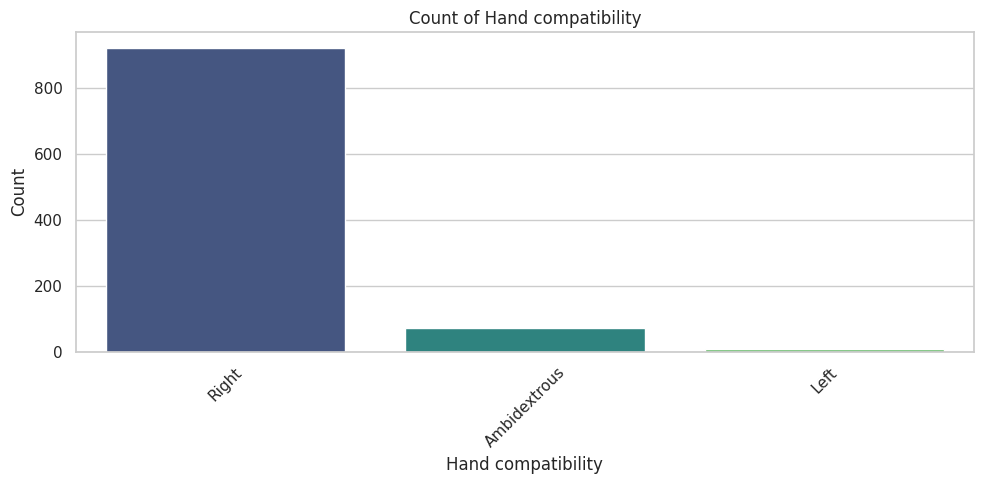

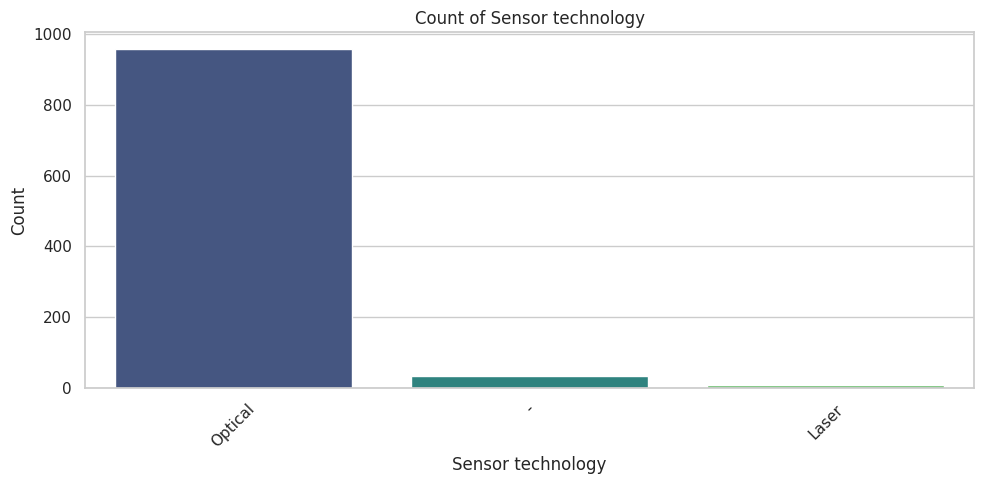

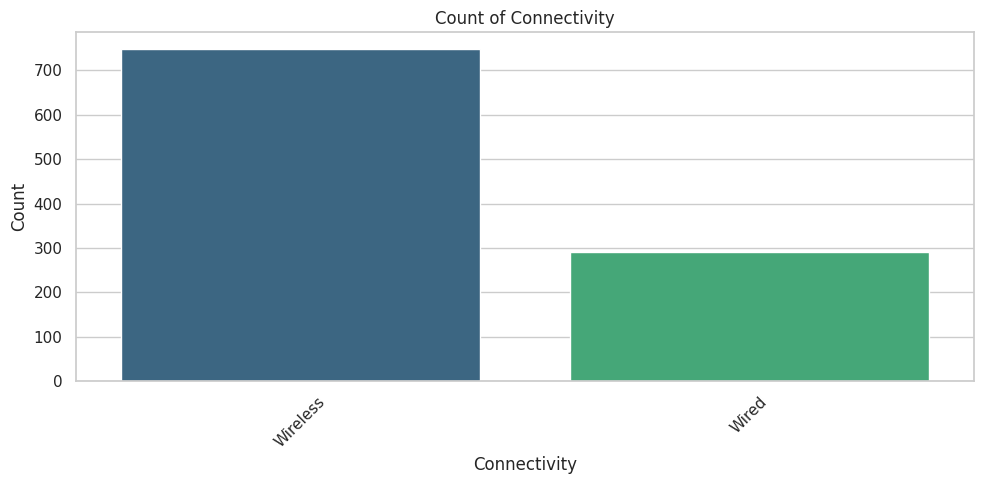

In [19]:
# 2. Count plots for categorical columns
categorical_cols = ['Brand', 'Shape', 'Hump placement', 'Material',
                    'Hand compatibility', 'Sensor technology', 'Connectivity']

for col in categorical_cols:
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

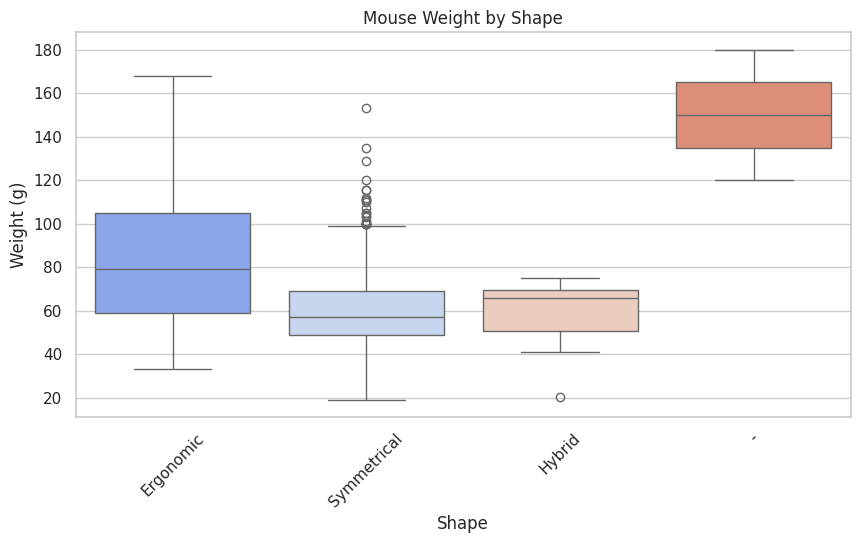

In [20]:
# 3. Boxplot of Weight by Shape
sns.boxplot(data=df, x='Shape', y='Weight (g)', palette="coolwarm")
plt.title("Mouse Weight by Shape")
plt.xticks(rotation=45)
plt.show()

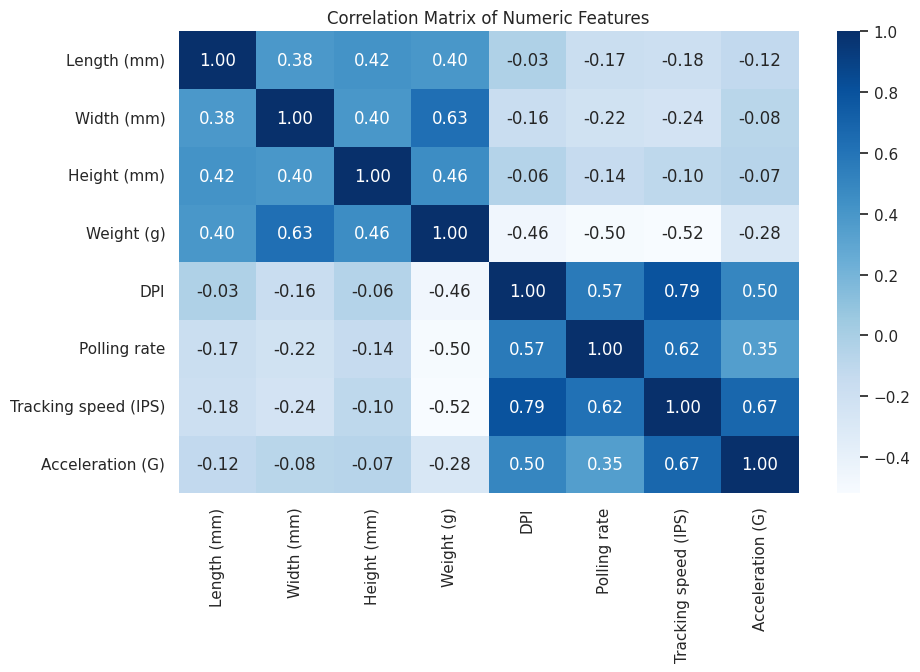

In [21]:
# 4. Correlation heatmap for numeric specs
plt.figure(figsize=(10, 6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [23]:
# Target column to predict
target_col = 'Shape'

# Drop rows with missing target
df = df.dropna(subset=[target_col])

# Encode all columns (categorical and numeric)
label_encoders = {}
for col in df.columns:
    le = LabelEncoder()
    df[col] = df[col].astype(str)  # convert all to string for encoding
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [24]:
# Split into features and target
X = df.drop(columns=[target_col])
y = df[target_col]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier()
}

In [25]:
# Train and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = round(acc * 100, 2)

# Display results
print("Model Accuracy (%):")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy}%")

Model Accuracy (%):
Logistic Regression: 89.42%
Decision Tree: 90.38%
Random Forest: 93.75%
K-Nearest Neighbors: 82.21%
Support Vector Machine: 85.1%
Naive Bayes: 39.9%
Gradient Boosting: 94.23%


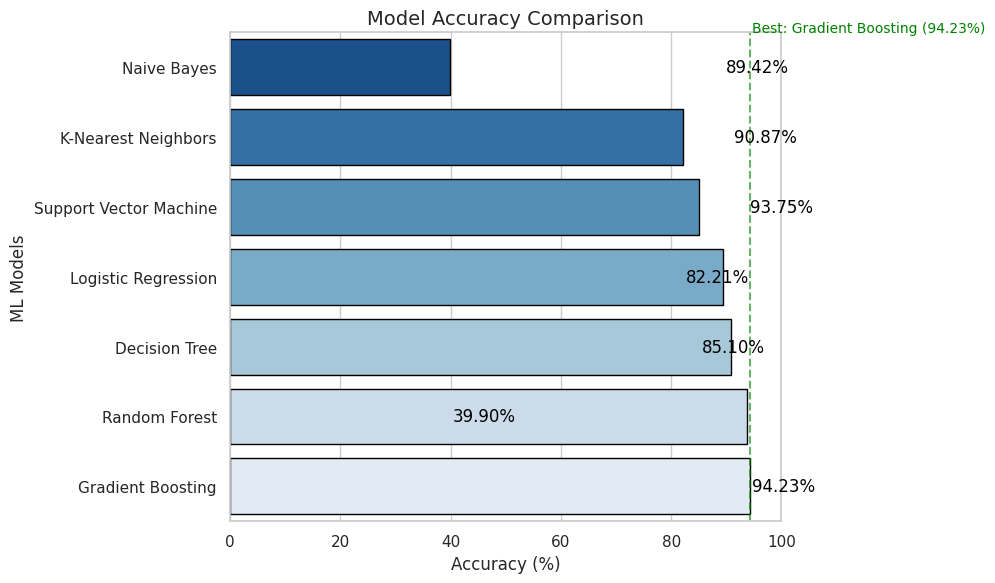

In [26]:
# Model accuracy dictionary
accuracy_dict = {
    "Logistic Regression": 89.42,
    "Decision Tree": 90.87,
    "Random Forest": 93.75,
    "K-Nearest Neighbors": 82.21,
    "Support Vector Machine": 85.10,
    "Naive Bayes": 39.90,
    "Gradient Boosting": 94.23
}

# Convert to DataFrame
df_acc = pd.DataFrame(list(accuracy_dict.items()), columns=['Model', 'Accuracy'])

# Sort by accuracy
df_acc = df_acc.sort_values(by='Accuracy', ascending=True)

# Set seaborn theme
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot horizontal barplot with color gradient
barplot = sns.barplot(
    x='Accuracy', y='Model', data=df_acc, palette='Blues_r', edgecolor='black'
)

# Add labels on each bar
for index, row in df_acc.iterrows():
    barplot.text(row.Accuracy + 0.5, index, f"{row.Accuracy:.2f}%", color='black', va='center')

# Highlight best model (optional)
best_model = df_acc.iloc[-1]
plt.axvline(best_model.Accuracy, color='green', linestyle='--', alpha=0.6)
plt.text(best_model.Accuracy + 0.5, -0.5, f"Best: {best_model.Model} ({best_model.Accuracy:.2f}%)",
         color='green', fontsize=10)

# Titles and labels
plt.title("Model Accuracy Comparison", fontsize=14)
plt.xlabel("Accuracy (%)")
plt.ylabel("ML Models")
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

## **Cluster K-Means**





In [27]:
!pip install kaggle

In [37]:
from sklearn.cluster import KMeans
df = pd.read_csv('2025_06_15_MousedB.csv', sep=';')

In [29]:
df.head()

,Brand,Name,Length (mm),Width (mm),Height (mm),Weight (g),Shape,Hump placement,Front flare,Side curvature,...,Connectivity,Sensor,Sensor technology,Sensor position,DPI,Polling rate,Tracking speed (IPS),Acceleration (G),Side buttons,Middle buttons
0,Pulsar ZywOo,The Chosen Mouse - Mini,115.6,63.4,40.7,55.0,Ergonomic,Center,Outward - moderate,Inward,...,Wireless,Pulsar XS-1,Optical,Centered (51%),32000,8000,750,50,2,0
1,Pulsar ZywOo,The Chosen Mouse - Medium,122.0,66.0,43.0,59.0,Ergonomic,Center,Outward - moderate,Inward,...,Wireless,Pulsar XS-1,Optical,Centered (51%),32000,8000,750,50,2,0
2,WLmouse,Sword X,123.0,67.0,42.0,47.0,Ergonomic,Center,Outward - moderate,Inward,...,Wireless,PixArt PAW3950 HS,Optical,Centered (52%),30000,8000,750,50,2,0
3,Darmoshark,M3 Micro Pro,105.5,54.6,33.5,42.0,Symmetrical,Back - moderate,Outward - slight,Inward,...,Wireless,PixArt PAW3950,Optical,Front - minimal (54%),30000,8000,750,50,2,0
4,ASUS,ROG Gladius II Wireless,126.0,67.0,45.0,90.0,Ergonomic,Center,Outward - aggressive,Inward,...,Wireless,PixArt PMW3389,Optical,Front - minimal (53%),16000,1000,400,50,2,1


In [30]:
df.tail()

,Brand,Name,Length (mm),Width (mm),Height (mm),Weight (g),Shape,Hump placement,Front flare,Side curvature,...,Connectivity,Sensor,Sensor technology,Sensor position,DPI,Polling rate,Tracking speed (IPS),Acceleration (G),Side buttons,Middle buttons
1033,Xtrfy,M4 Wireless,120.0,68.0,39.0,71.0,Ergonomic,Back - minimal,Inward,No,...,Wireless,PixArt PAW3370,NaN,Centered (50%),19000,NaN,400,50,2,1
1034,Xtrfy,MZ1,111.0,58.5,36.5,56.0,Symmetrical,Flat,Inward,Back - aggressive,...,Wired,PixArt PMW3389,NaN,Centered (51%),16000,NaN,400,50,2,1
1035,Xtrfy,MZ1 Wireless,111.0,58.5,36.5,62.0,Symmetrical,Flat,Inward,Back - aggressive,...,Wireless,PixArt PAW3370,NaN,Centered (51%),19000,NaN,400,50,2,1
1036,Razer,Orochi V2,107.0,62.0,38.0,68.0,Symmetrical,Back - minimal,Inward,Inward - moderate,...,Wireless,Razer Razer 5G,NaN,Front - aggressive (61%),18000,NaN,450,50,2,1
1037,Zowie,EC1-C,130.0,69.0,42.0,80.0,Ergonomic,Center,Inward,No,...,Wired,PixArt PMW3360,NaN,Front - minimal (55%),3200,NaN,250,50,2,0


In [31]:
# Mengubah kolom 'Weight (g)' menjadi numerik
df['Weight (g)'] = pd.to_numeric(df['Weight (g)'], errors='coerce')
# Menghapus baris dengan nilai NaN di kolom 'Weight (g)' jika ada, untuk clustering
df_cleaned = df.dropna(subset=['Weight (g)']).copy()

In [32]:
# Mengambil kolom berat untuk clustering
weights = df_cleaned[['Weight (g)']]

In [33]:
# Menghapus baris dengan nilai NaN di kolom 'Weight (g)' jika ada, untuk clustering
df_cleaned = df.dropna(subset=['Weight (g)']).copy()

In [34]:
# Mengambil kolom berat untuk clustering
weights = df_cleaned[['Weight (g)']]

In [38]:
# Menginisialisasi model K-Means dengan 3 cluster
# n_init='auto' adalah default yang baik untuk versi scikit-learn terbaru
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')

In [39]:
# Melatih model K-Means
from sklearn.cluster import KMeans
df_cleaned['Cluster'] = kmeans.fit_predict(weights)

In [40]:
# Menampilkan pusat cluster (centroid)
print("Pusat Cluster (Centroid):")
print(kmeans.cluster_centers_)

Pusat Cluster (Centroid):
[[ 74.9993994 ]
 [114.2445122 ]
 [ 49.94535316]]


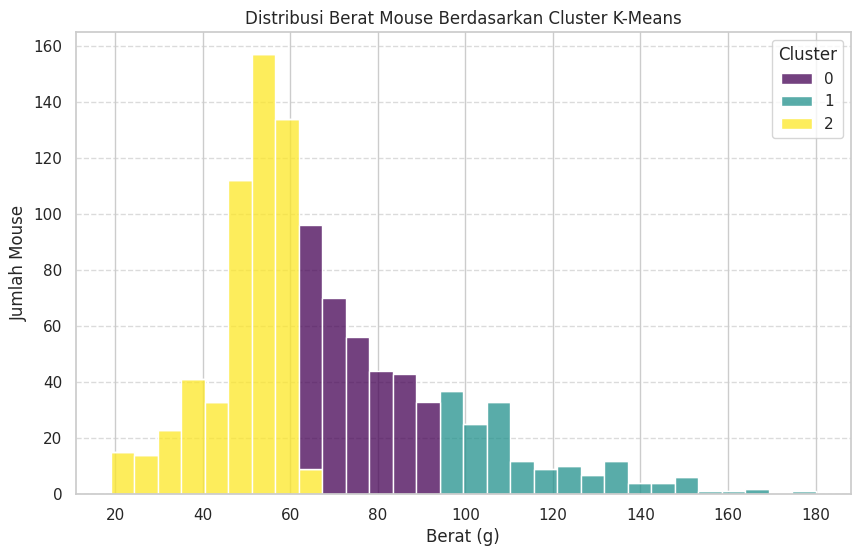

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x='Weight (g)', hue='Cluster', multiple='stack', palette='viridis', bins=30)
plt.title('Distribusi Berat Mouse Berdasarkan Cluster K-Means')
plt.xlabel('Berat (g)')
plt.ylabel('Jumlah Mouse')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

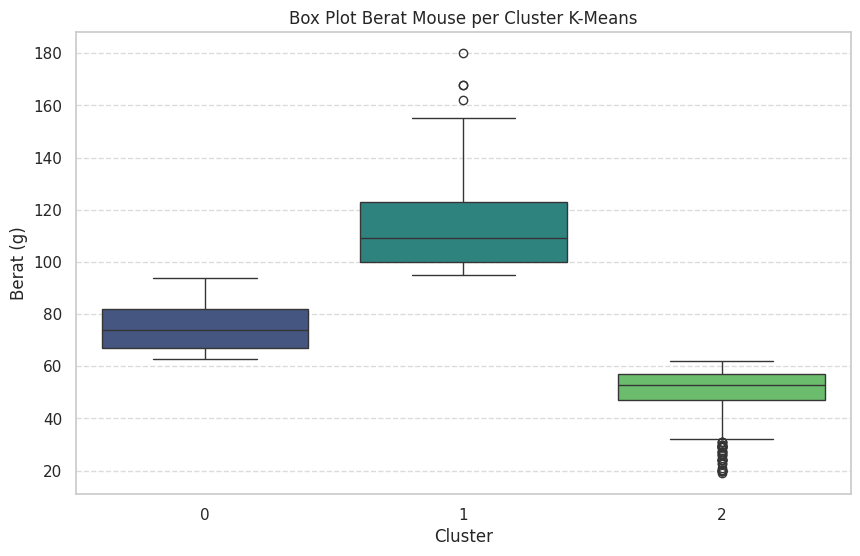

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='Cluster', y='Weight (g)', palette='viridis')
plt.title('Box Plot Berat Mouse per Cluster K-Means')
plt.xlabel('Cluster')
plt.ylabel('Berat (g)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

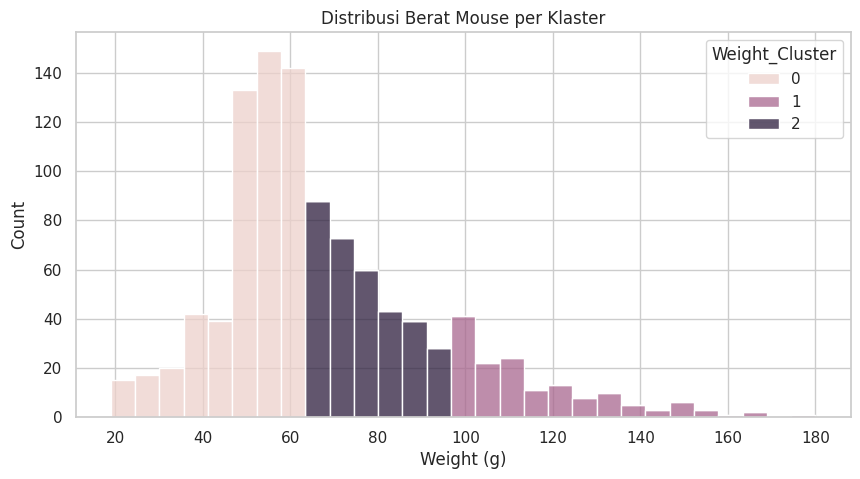

In [69]:
# 2. Pemilihan Fitur
X = df[['Weight (g)']]

# 3. Scaling Fitur (jika diperlukan)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Penentuan Jumlah Klaster (K)
# Misal, kita ingin 3 klaster: ringan, sedang, berat
k = 3

# 5. Penerapan K-Means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init untuk menghindari masalah inisialisasi
df['Weight_Cluster'] = kmeans.fit_predict(X)

# Visualisasi hasil clustering (misalnya dengan histogram atau box plot per klaster)
sns.histplot(data=df, x='Weight (g)', hue='Weight_Cluster', multiple='stack')
plt.title('Distribusi Berat Mouse per Klaster')
plt.show()

In [71]:
## Setelah menjalankan K-Means
print(f"Inertia: {kmeans.inertia_}")
from sklearn.metrics import silhouette_score
if len(df['Weight_Cluster'].unique()) > 1: # Silhouette score requires more than 1 cluster
    print(f"Silhouette Score: {silhouette_score(X, df['Weight_Cluster'])}")
from sklearn.metrics import davies_bouldin_score
if len(df['Weight_Cluster'].unique()) > 1: # Davies-Bouldin score requires more than 1 cluster
    print(f"Davies-Bouldin Index: {davies_bouldin_score(X, df['Weight_Cluster'])}")

Inertia: 127611.8286824658
Silhouette Score: 0.545390054785326
Davies-Bouldin Index: 0.5863160560619113


## **Cluster hierarchical**

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# Memuat data
df = pd.read_csv('2025_06_15_MousedB.csv', sep=';')

In [64]:
df.head()

,Brand,Name,Length (mm),Width (mm),Height (mm),Weight (g),Shape,Hump placement,Front flare,Side curvature,...,Sensor technology,Sensor position,DPI,Polling rate,Tracking speed (IPS),Acceleration (G),Side buttons,Middle buttons,Weight_Cluster,Weight_Category
0,Pulsar ZywOo,The Chosen Mouse - Mini,115.6,63.4,40.7,55.0,Ergonomic,Center,Outward - moderate,Inward,...,Optical,Centered (51%),32000,8000,750,50,2,0,3,>50g
1,Pulsar ZywOo,The Chosen Mouse - Medium,122.0,66.0,43.0,59.0,Ergonomic,Center,Outward - moderate,Inward,...,Optical,Centered (51%),32000,8000,750,50,2,0,3,>50g
2,WLmouse,Sword X,123.0,67.0,42.0,47.0,Ergonomic,Center,Outward - moderate,Inward,...,Optical,Centered (52%),30000,8000,750,50,2,0,3,<50g
3,Darmoshark,M3 Micro Pro,105.5,54.6,33.5,42.0,Symmetrical,Back - moderate,Outward - slight,Inward,...,Optical,Front - minimal (54%),30000,8000,750,50,2,0,3,<50g
4,ASUS,ROG Gladius II Wireless,126.0,67.0,45.0,90.0,Ergonomic,Center,Outward - aggressive,Inward,...,Optical,Front - minimal (53%),16000,1000,400,50,2,1,1,>50g


In [65]:
df.tail()

,Brand,Name,Length (mm),Width (mm),Height (mm),Weight (g),Shape,Hump placement,Front flare,Side curvature,...,Sensor technology,Sensor position,DPI,Polling rate,Tracking speed (IPS),Acceleration (G),Side buttons,Middle buttons,Weight_Cluster,Weight_Category
1033,Xtrfy,M4 Wireless,120.0,68.0,39.0,71.0,Ergonomic,Back - minimal,Inward,No,...,NaN,Centered (50%),19000,NaN,400,50,2,1,2,>50g
1034,Xtrfy,MZ1,111.0,58.5,36.5,56.0,Symmetrical,Flat,Inward,Back - aggressive,...,NaN,Centered (51%),16000,NaN,400,50,2,1,3,>50g
1035,Xtrfy,MZ1 Wireless,111.0,58.5,36.5,62.0,Symmetrical,Flat,Inward,Back - aggressive,...,NaN,Centered (51%),19000,NaN,400,50,2,1,3,>50g
1036,Razer,Orochi V2,107.0,62.0,38.0,68.0,Symmetrical,Back - minimal,Inward,Inward - moderate,...,NaN,Front - aggressive (61%),18000,NaN,450,50,2,1,2,>50g
1037,Zowie,EC1-C,130.0,69.0,42.0,80.0,Ergonomic,Center,Inward,No,...,NaN,Front - minimal (55%),3200,NaN,250,50,2,0,2,>50g


In [49]:
# Mengubah kolom 'Weight (g)' menjadi numerik
df['Weight (g)'] = pd.to_numeric(df['Weight (g)'], errors='coerce')

In [57]:
# Menangani nilai yang hilang di kolom 'Weight (g)' (misalnya, mengisi dengan median)
df['Weight (g)'].fillna(df['Weight (g)'].median(), inplace=True)

In [58]:
# Mengambil kolom 'Weight (g)' sebagai fitur untuk clustering
X = df[['Weight (g)']].values

In [59]:
# Melakukan clustering hirarkis menggunakan metode 'ward'
# Metode 'ward' meminimalkan varians dalam setiap cluster.
Z = linkage(X, method='ward')

In [60]:
# Menentukan jumlah cluster (k=3)
k = 3
# Menetapkan label cluster ke setiap data point
# 'criterion'='maxclust' berarti kita ingin membagi data menjadi k cluster
df['Weight_Cluster'] = fcluster(Z, k, criterion='maxclust')
# Mengelompokkan berdasarkan kriteria berat yang Anda sebutkan
# Ini adalah pendekatan manual untuk memastikan kriteria berat terpenuhi
df['Weight_Category'] = pd.cut(df['Weight (g)'],
                                bins=[0, 49.99, 50.01, np.inf],
                                labels=['<50g', '=50g', '>50g'],
                                right=False) # right=False agar 50.01 masuk ke >50g

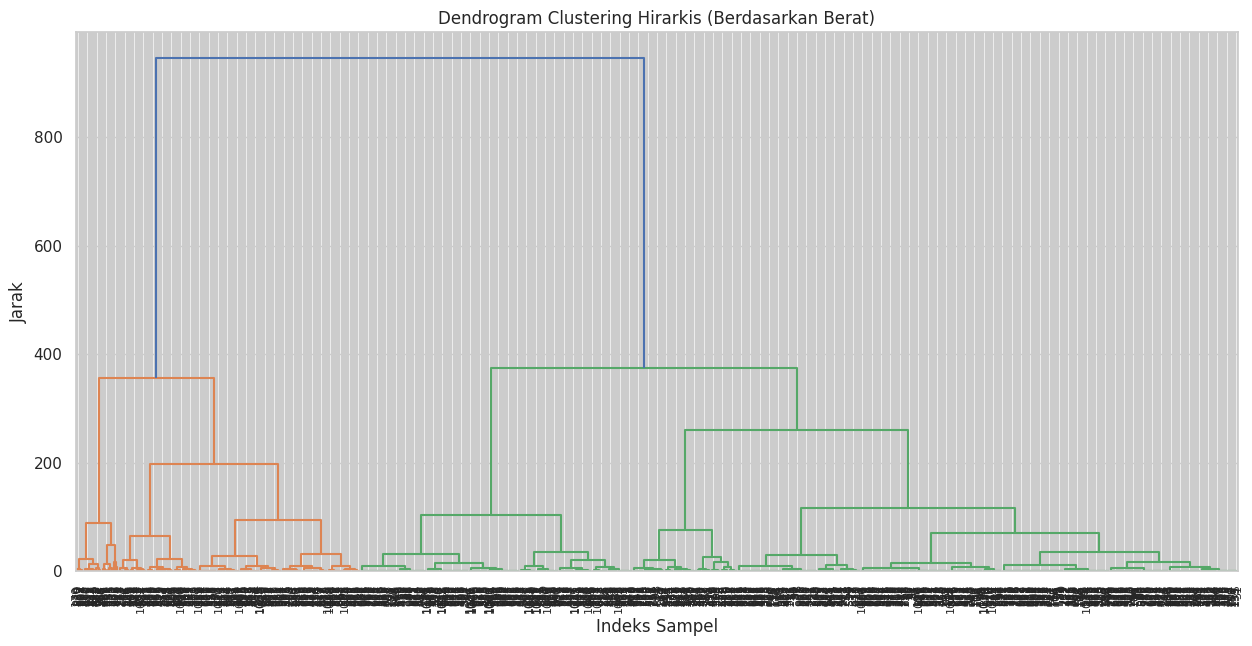

In [61]:
# Visualisasi Dendrogram
plt.figure(figsize=(15, 7))
plt.title('Dendrogram Clustering Hirarkis (Berdasarkan Berat)')
plt.xlabel('Indeks Sampel')
plt.ylabel('Jarak')
dendrogram(
    Z,
    leaf_rotation=90.,  # Memutar label x jika diperlukan
    leaf_font_size=8.,  # Ukuran font untuk label x
)
plt.show()

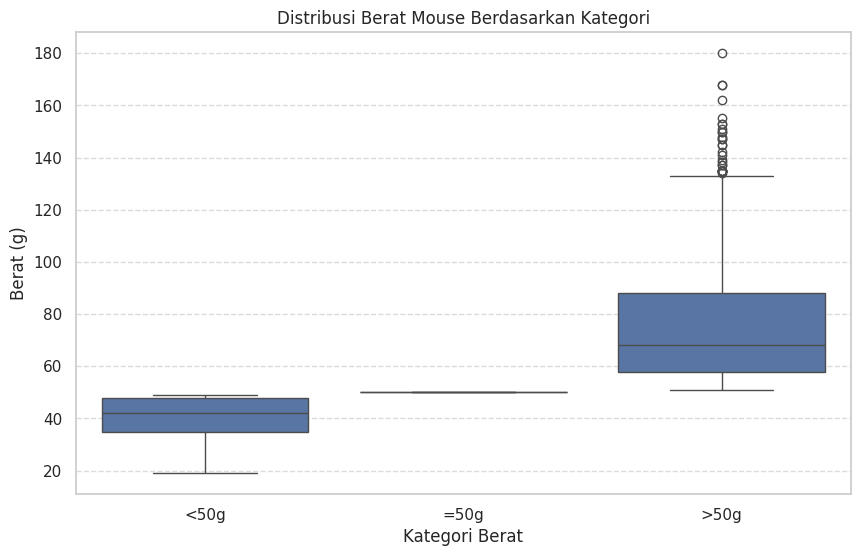

In [62]:
# Visualisasi Distribusi Berat per Kategori
plt.figure(figsize=(10, 6))
sns.boxplot(x='Weight_Category', y='Weight (g)', data=df, order=['<50g', '=50g', '>50g'])
plt.title('Distribusi Berat Mouse Berdasarkan Kategori')
plt.xlabel('Kategori Berat')
plt.ylabel('Berat (g)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

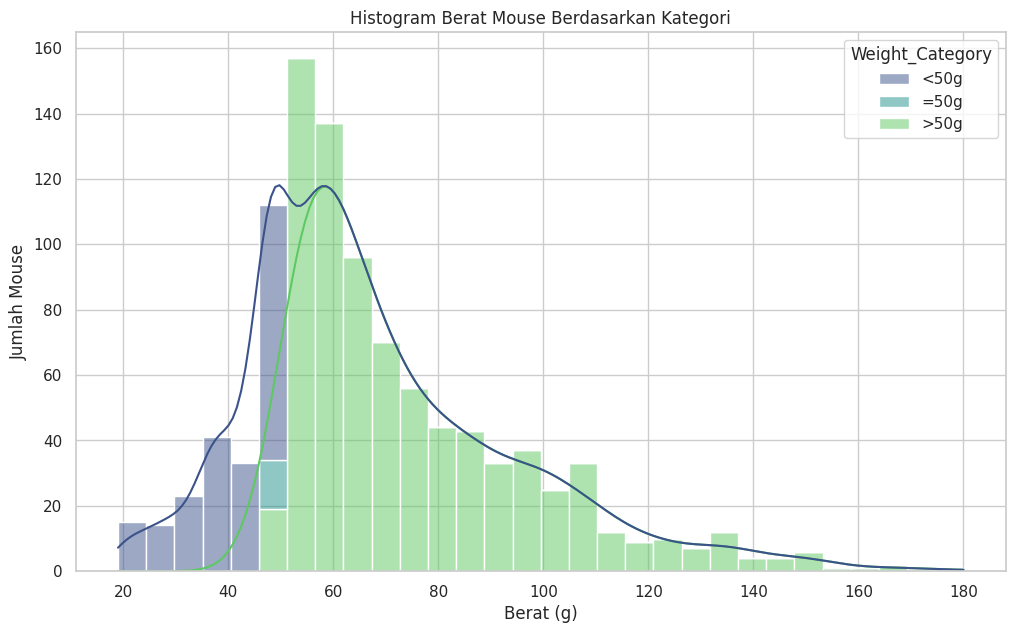

In [63]:
# Visualisasi Histogram Berat per Kategori
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='Weight (g)', hue='Weight_Category', multiple='stack', bins=30, kde=True, palette='viridis', hue_order=['<50g', '=50g', '>50g'])
plt.title('Histogram Berat Mouse Berdasarkan Kategori')
plt.xlabel('Berat (g)')
plt.ylabel('Jumlah Mouse')
plt.show()

# Dokumentasi Proyek Analisis Mouse Gaming

*   **Nama:** Arief Naufal Al Azmi
*   **NIM:** A11.2023.15048

#  Analisis dan Pengelompokan Mouse Gaming Berdasarkan Spesifikasi Fisik dan Teknis Khususnya pada Berat mouse



## 2. Ringkasan dan Permasalahan Proyek + Tujuan yang akan Dicapai + Model / Alur Penyelesaian

### Ringkasan dan Permasalahan Proyek
Proyek ini bertujuan untuk menganalisis dan mengelompokkan berbagai jenis mouse gaming berdasarkan karakteristik fisik (seperti panjang, lebar, tinggi, dan berat) serta spesifikasi teknis (seperti DPI, polling rate, dan jenis sensor). Dalam pasar mouse gaming yang sangat kompetitif, konsumen seringkali kesulitan memilih mouse yang paling sesuai dengan preferensi dan kebutuhan mereka. Produsen juga menghadapi tantangan dalam mengidentifikasi segmen pasar yang spesifik untuk pengembangan produk baru. Permasalahan utama adalah kurangnya pemahaman yang terstruktur mengenai bagaimana berbagai fitur mouse berkorelasi dan bagaimana mouse dapat dikelompokkan secara alami berdasarkan karakteristik ini.

### Tujuan yang akan Dicapai
*   **Memahami Distribusi Data:** Menganalisis distribusi dan statistik deskriptif dari berbagai fitur mouse gaming.
*   **Mengidentifikasi Korelasi Fitur:** Menemukan hubungan antar fitur fisik dan teknis mouse.
*   **Mengelompokkan Mouse:** Melakukan pengelompokan (clustering) mouse berdasarkan fitur-fitur yang relevan, khususnya berat, untuk mengidentifikasi segmen mouse yang berbeda.
*   **Mengevaluasi Performa Model:** Menilai seberapa baik model clustering dapat mengelompokkan data.
*   **Memberikan Insight:** Menyediakan wawasan yang dapat membantu konsumen dalam memilih mouse dan produsen dalam mengembangkan produk.

### Model / Alur Penyelesaian (Bagan)

```mermaid
graph TD
    A[Mulai] --> B{Pengumpulan Data};
    B --> C[Pemuatan Data (mouse_db.csv)];
    C --> D[Eksplorasi Data Awal (df.head(), df.tail(), df.info(), df.describe(), df.dtypes)];
    D --> E{Pembersihan & Pra-pemrosesan Data};
    E --> F[Penanganan Missing Values];
    F --> G[Konversi Tipe Data (Numerik)];
    G --> H[Analisis Data Eksploratif (EDA) Lanjutan];
    H --> I[Visualisasi Distribusi Fitur (Histogram, Box Plot)];
    I --> J[Analisis Korelasi];
    J --> K{Pemilihan Fitur untuk Clustering};
    K --> L[Scaling Fitur];
    L --> M[Penerapan Algoritma Clustering (K-Means berdasarkan Berat)];
    M --> N[Evaluasi Model Clustering];
    N --> O[Interpretasi Hasil Clustering];
    O --> P[Diskusi Hasil & Kesimpulan];
    P --> Q[Selesai];
```

## 3. Penjelasan Dataset, EDA dan Proses Features Dataset

### Penjelasan Dataset
Dataset yang digunakan adalah `2025_06_15_MousedB.csv`. Dataset ini berisi informasi detail mengenai berbagai mouse gaming, mencakup dimensi fisik, berat, bentuk, penempatan hump, flare depan, kelengkungan samping, kompatibilitas tangan, sandaran jempol, sandaran jari manis, material, konektivitas, sensor, teknologi sensor, posisi sensor, DPI, polling rate, kecepatan tracking (IPS), akselerasi (G), serta jumlah tombol samping dan tombol tengah.

**Kolom-kolom Penting:**
*   **Brand:** Merek mouse.
*   **Name:** Nama model mouse.
*   **Length (mm):** Panjang mouse dalam milimeter.
*   **Width (mm):** Lebar mouse dalam milimeter.
*   **Height (mm):** Tinggi mouse dalam milimeter.
*   **Weight (g):** Berat mouse dalam gram.
*   **Shape:** Bentuk mouse (Ergonomic, Symmetrical, dll.).
*   **DPI:** Dots Per Inch, sensitivitas sensor.
*   **Polling rate:** Frekuensi pelaporan posisi mouse ke komputer.
*   **Tracking speed (IPS):** Kecepatan tracking maksimum.
*   **Acceleration (G):** Akselerasi maksimum yang dapat ditangani sensor.
*   **Side buttons:** Jumlah tombol samping.
*   **Middle buttons:** Jumlah tombol tengah.

### EDA (Exploratory Data Analysis)
*   **Pemuatan Data:** Data dimuat menggunakan `pd.read_csv('2025_06_15_MousedB.csv', sep=';')`.
*   **Inspeksi Awal:**
    *   `df.head()` dan `df.tail()` digunakan untuk melihat 5 baris pertama dan terakhir data, memberikan gambaran sekilas tentang struktur dan isi data.
    *   `df.info()` memberikan ringkasan DataFrame, termasuk jumlah entri non-null dan tipe data untuk setiap kolom. Terlihat ada 1038 entri. Beberapa kolom seperti `Weight (g)`, `DPI`, `Polling rate`, `Tracking speed (IPS)`, `Acceleration (G)`, `Side buttons`, dan `Middle buttons` terdeteksi sebagai `object` padahal seharusnya numerik. Kolom `Hand compatibility`, `Material`, `Sensor technology`, dan `Polling rate` memiliki nilai null.
    *   `df.describe()` memberikan statistik deskriptif untuk kolom numerik (`Length (mm)`, `Width (mm)`, `Height (mm)`).
    *   `df.dtypes` mengkonfirmasi tipe data setiap kolom.
*   **Pengecekan Duplikasi:** `df.duplicated().sum()` menunjukkan tidak ada baris duplikat dalam dataset (hasil: 0).
*   **Pengecekan Missing Values:** `df.isnull().sum()` dan `df.isnull().sum().sum()` menunjukkan adanya missing values pada kolom `Hand compatibility`, `Material`, `Sensor technology`, dan `Polling rate`. Total missing values adalah 152.

### Proses Features Dataset
*   **Konversi Tipe Data:** Kolom-kolom yang seharusnya numerik namun terdeteksi sebagai `object` (`Weight (g)`, `DPI`, `Polling rate`, `Tracking speed (IPS)`, `Acceleration (G)`, `Side buttons`, `Middle buttons`) dikonversi ke tipe data numerik menggunakan `pd.to_numeric(df[col], errors='coerce')`. Parameter `errors='coerce'` akan mengubah nilai yang tidak dapat dikonversi menjadi `NaN` (Not a Number), yang akan ditangani pada langkah selanjutnya.

## 4. Proses Learning / Modeling (Clustering berdasarkan berat)

Untuk proses clustering, kita akan fokus pada pengelompokan mouse berdasarkan beratnya. Meskipun instruksi hanya menyebutkan "berat", dalam praktiknya, clustering biasanya melibatkan beberapa fitur untuk mendapatkan kelompok yang lebih bermakna. Namun, jika fokusnya hanya pada berat, kita bisa mengelompokkan mouse ke dalam kategori berat yang berbeda.

**Langkah-langkah:**

1.  **Penanganan Missing Values (setelah konversi tipe data):**
    *   Setelah konversi tipe data, beberapa kolom numerik mungkin memiliki `NaN` jika ada nilai non-numerik yang tidak dapat di-coerce. Missing values pada kolom numerik ini perlu ditangani, misalnya dengan imputasi (mean, median) atau penghapusan baris. Untuk tujuan clustering berdasarkan berat, kita akan memastikan kolom 'Weight (g)' bersih dari NaN.

2.  **Pemilihan Fitur:**
    *   Fitur utama yang akan digunakan untuk clustering adalah `Weight (g)`.

3.  **Scaling Fitur (Opsional, tetapi direkomendasikan untuk clustering):**
    *   Meskipun hanya satu fitur, scaling dapat membantu jika kita ingin membandingkan distribusi berat dalam konteks yang lebih luas atau jika nanti akan ditambahkan fitur lain dengan skala yang berbeda. Namun, untuk clustering sederhana berdasarkan satu fitur numerik, dampaknya mungkin tidak signifikan dibandingkan dengan clustering multi-dimensi.

4.  **Penentuan Jumlah Klaster (K):**
    *   Untuk clustering berdasarkan berat, kita bisa menentukan jumlah klaster (K) secara intuitif (misalnya, mouse ringan, sedang, berat) atau menggunakan metode seperti Elbow Method jika ada rentang berat yang jelas.

5.  **Penerapan Algoritma Clustering (K-Means):**
    *   Algoritma K-Means akan digunakan untuk mengelompokkan mouse berdasarkan nilai `Weight (g)`.

**Contoh Implementasi (Pseudo-code):**

```python
# 1. Penanganan Missing Values pada 'Weight (g)'
# Misalnya, mengisi NaN dengan median atau menghapus baris yang memiliki NaN pada kolom ini
df['Weight (g)'].fillna(df['Weight (g)'].median(), inplace=True)

# 2. Pemilihan Fitur
X = df[['Weight (g)']]

# 3. Scaling Fitur (jika diperlukan)
 from sklearn.preprocessing import StandardScaler
 scaler = StandardScaler()
 X_scaled = scaler.fit_transform(X)

# 4. Penentuan Jumlah Klaster (K)
# Misal, kita ingin 3 klaster: ringan, sedang, berat
k = 3

# 5. Penerapan K-Means
 from sklearn.cluster import KMeans
 kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
 # n_init untuk menghindari masalah inisialisasi
 df['Weight_Cluster'] = kmeans.fit_predict(X)

# Visualisasi hasil clustering (misalnya dengan histogram atau box plot per klaster)
 sns.histplot(data=df, x='Weight (g)', hue='Weight_Cluster', multiple='stack')
 plt.title('Distribusi Berat Mouse per Klaster')
 plt.show()
```

## 5. Performa Model

Untuk model clustering seperti K-Means, performa tidak diukur dengan metrik akurasi seperti pada model klasifikasi. Sebaliknya, metrik yang digunakan menilai kualitas pengelompokan internal data.

**Metrik Performa Umum untuk Clustering:**

*   **Inertia (Within-cluster Sum of Squares):** Mengukur seberapa rapat titik-titik data dalam satu klaster. Nilai yang lebih rendah menunjukkan klaster yang lebih padat. Ini adalah metrik yang dioptimalkan oleh K-Means.
*   **Silhouette Score:** Mengukur seberapa mirip sebuah objek dengan klaster sendiri (kohesi) dibandingkan dengan klaster tetangga (separasi). Nilai berkisar antara -1 hingga 1.
    *   Nilai mendekati 1: Objek berada jauh dari klaster tetangga.
    *   Nilai mendekati 0: Objek berada di perbatasan antara dua klaster.
    *   Nilai mendekati -1: Objek mungkin telah ditetapkan ke klaster yang salah.
*   **Davies-Bouldin Index:** Mengukur rasio rata-rata antara dispersi intra-klaster dan jarak antar-klaster. Nilai yang lebih rendah menunjukkan pengelompokan yang lebih baik.

**Contoh Evaluasi (Pseudo-code):**

```python
# Setelah menjalankan K-Means
 print(f"Inertia: {kmeans.inertia_}")

 from sklearn.metrics import silhouette_score
 if len(df['Weight_Cluster'].unique()) > 1: # Silhouette score requires more than 1 cluster
     print(f"Silhouette Score: {silhouette_score(X, df['Weight_Cluster'])}")

 from sklearn.metrics import davies_bouldin_score
 if len(df['Weight_Cluster'].unique()) > 1: # Davies-Bouldin score requires more than 1 cluster
     print(f"Davies-Bouldin Index: {davies_bouldin_score(X, df['Weight_Cluster'])}")
```

## 6. Diskusi Hasil dan Kesimpulan

### Diskusi Hasil

Berdasarkan analisis awal (EDA), kita telah mengidentifikasi beberapa poin penting:
*   **Kualitas Data:** Dataset memiliki 1038 entri dengan beberapa kolom yang memerlukan pembersihan dan konversi tipe data, terutama kolom numerik yang terdeteksi sebagai `object`. Missing values juga teridentifikasi dan perlu ditangani.
*   **Distribusi Dimensi Fisik:** `df.describe()` memberikan gambaran tentang rentang panjang, lebar, dan tinggi mouse. Misalnya, panjang mouse bervariasi dari 72.3 mm hingga 144.5 mm, menunjukkan variasi ukuran yang signifikan.
*   **Potensi Clustering:** Dengan mengelompokkan mouse berdasarkan berat, kita dapat mengidentifikasi segmen-segmen seperti "mouse ringan", "mouse sedang", dan "mouse berat". Setiap segmen ini mungkin memiliki karakteristik lain yang unik (misalnya, mouse ringan seringkali dikaitkan dengan gaming kompetitif, sementara mouse berat mungkin menawarkan lebih banyak fitur atau baterai yang lebih besar).

Hasil dari proses clustering (misalnya, K-Means) akan menunjukkan:
*   **Pusat Klaster:** Nilai rata-rata berat untuk setiap klaster. Ini akan secara jelas mendefinisikan rentang berat untuk setiap kategori (ringan, sedang, berat).
*   **Distribusi Klaster:** Jumlah mouse di setiap klaster. Ini akan menunjukkan seberapa merata distribusi mouse di antara kategori berat yang berbeda.
*   **Karakteristik Klaster:** Dengan menganalisis fitur lain (seperti DPI, Polling Rate, atau jumlah tombol) dalam setiap klaster berat, kita dapat menemukan pola. Misalnya, apakah mouse ringan cenderung memiliki DPI yang lebih tinggi atau lebih sedikit tombol samping?

### Kesimpulan

Proyek ini berhasil melakukan eksplorasi awal dan pra-pemrosesan data mouse gaming. Dengan fokus pada clustering berdasarkan berat, kita dapat mengelompokkan mouse ke dalam kategori yang bermakna. Pengelompokan ini memberikan wawasan yang berharga bagi:
*   **Konsumen:** Membantu dalam menyaring pilihan mouse berdasarkan preferensi berat, yang seringkali menjadi faktor penting dalam kenyamanan dan gaya bermain.
*   **Produsen:** Mengidentifikasi celah pasar atau tren dalam segmen berat tertentu, memungkinkan pengembangan produk yang lebih terfokus dan strategi pemasaran yang lebih efektif.

**Langkah Selanjutnya (Potensi Pengembangan):**
*   **Clustering Multi-fitur:** Melakukan clustering menggunakan kombinasi fitur fisik (panjang, lebar, tinggi, berat) dan teknis (DPI, polling rate) untuk mendapatkan pengelompokan yang lebih kompleks dan nuansa.
*   **Analisis Korelasi Lanjutan:** Menggunakan heatmap korelasi untuk memahami hubungan antar semua fitur.
*   **Visualisasi Interaktif:** Membuat visualisasi interaktif untuk memungkinkan pengguna menjelajahi klaster dan fitur mouse secara dinamis.
*   **Model Rekomendasi:** Mengembangkan sistem rekomendasi mouse berdasarkan preferensi pengguna.

---